# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [45]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [46]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [47]:
# Ваш код здесь
adver_data.head(5)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [48]:
# Ваш код здесь
adver_data[['TV','Radio','Newspaper','Sales']]


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [49]:
X =adver_data[['TV','Radio','Newspaper']].values#TV Radio Neswpaper 
y =adver_data['Sales'].values   #Sales
print X,y

[[ 230.1   37.8   69.2]
 [  44.5   39.3   45.1]
 [  17.2   45.9   69.3]
 [ 151.5   41.3   58.5]
 [ 180.8   10.8   58.4]
 [   8.7   48.9   75. ]
 [  57.5   32.8   23.5]
 [ 120.2   19.6   11.6]
 [   8.6    2.1    1. ]
 [ 199.8    2.6   21.2]
 [  66.1    5.8   24.2]
 [ 214.7   24.     4. ]
 [  23.8   35.1   65.9]
 [  97.5    7.6    7.2]
 [ 204.1   32.9   46. ]
 [ 195.4   47.7   52.9]
 [  67.8   36.6  114. ]
 [ 281.4   39.6   55.8]
 [  69.2   20.5   18.3]
 [ 147.3   23.9   19.1]
 [ 218.4   27.7   53.4]
 [ 237.4    5.1   23.5]
 [  13.2   15.9   49.6]
 [ 228.3   16.9   26.2]
 [  62.3   12.6   18.3]
 [ 262.9    3.5   19.5]
 [ 142.9   29.3   12.6]
 [ 240.1   16.7   22.9]
 [ 248.8   27.1   22.9]
 [  70.6   16.    40.8]
 [ 292.9   28.3   43.2]
 [ 112.9   17.4   38.6]
 [  97.2    1.5   30. ]
 [ 265.6   20.     0.3]
 [  95.7    1.4    7.4]
 [ 290.7    4.1    8.5]
 [ 266.9   43.8    5. ]
 [  74.7   49.4   45.7]
 [  43.1   26.7   35.1]
 [ 228.    37.7   32. ]
 [ 202.5   22.3   31.6]
 [ 177.    33.4 

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [50]:
import numpy as np
means, stds = np.mean(X,axis=0), np.std(X,axis=0)

In [51]:
X = (X-means)/stds# Ваш код здесь

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [52]:
import numpy as np
X=np.hstack((X, np.ones((X.shape[0], 1))))

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [53]:
def mserror(y, y_pred):
    return (((y-y_pred)**2).sum())/y.shape[0]

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [54]:
A = [2]
A*3

[2, 2, 2]

In [55]:
print y.shape[0]
Y_const=np.array([np.median(y)]*y.shape[0])


200


In [56]:
answer1 =mserror(y,Y_const) # Ваш код здесь
print(answer1)
write_answer_to_file(answer1, '1.txt')

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [57]:
def normal_equation(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)  # Ваш код здесь

In [58]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[  3.91925365   2.79206274  -0.02253861  14.0225    ]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [59]:
answer2 =np.dot(X,norm_eq_weights) # Ваш код здесь
print(mserror(answer2, y))
print answer2.shape
#write_answer_to_file(answer2, '2.txt')

2.78412631451
(200L,)


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [60]:
def linear_prediction(X, w):
    return np.dot(X,w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [61]:
answer3 = mserror(y, linear_prediction(X,norm_eq_weights))# Ваш код здесь
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.78412631451


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [62]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    x_k=X[train_ind, :]
    y_k=y[train_ind]
    y_pred=np.dot(x_k,w)
    l=X.shape[0]
    return w+(2*eta/l)*(y_k-y_pred)*x_k

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - минимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [63]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    weight_dist = np.inf
    w = w_init
    errors = []# Сюда будем записывать ошибки на каждой итерации
    iter_num = 0# Счетчик итераций
    np.random.seed(seed)# Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        # Ваш код здесь
        old_w = w
        w = stochastic_gradient_step(X, y, w, random_ind, eta=eta)
        weight_dist = np.linalg.norm(w - old_w)
        errors.append(mserror(y, np.dot(X, w)))
        iter_num += 1
        if iter_num % 10000 == 0 and verbose:
            print "Iteration: ", iter_num
        return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [95]:
%%time
stoch_grad_desc_weights,stoch_errors_by_iter = stochastic_gradient_descent(X,y,np.zeros((X.shape[1])),eta=0.01,max_iter=10**5, verbose=True)# Ваш код здесь
print stoch_grad_desc_weights, stoch_errors_by_iter
print np.ones((X.shape[1]))

[ 0.0023012  -0.00131554 -0.00062364  0.00148   ] [223.66538899863156]
[ 1.  1.  1.  1.]
Wall time: 1e+03 µs


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


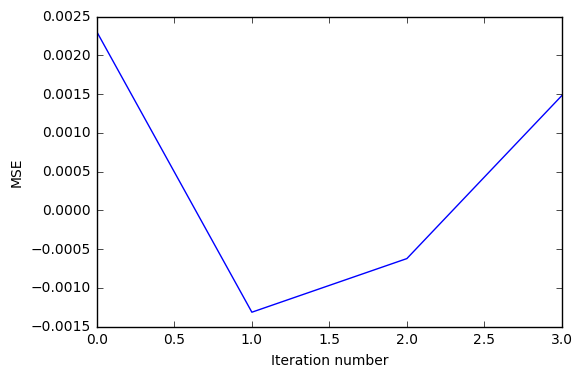

In [96]:
%pylab inline
plot(range(len(stoch_grad_desc_weights)), stoch_grad_desc_weights)
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


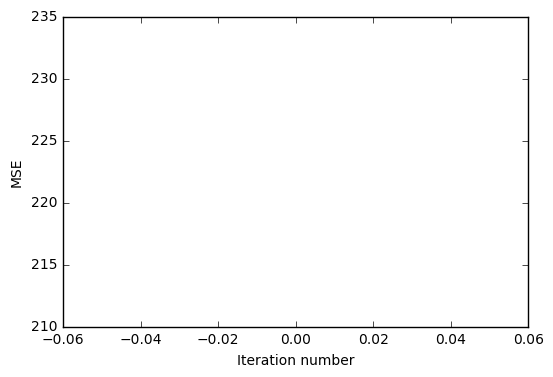

In [97]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [98]:
stoch_grad_desc_weights

array([ 0.0023012 , -0.00131554, -0.00062364,  0.00148   ])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [99]:
stoch_errors_by_iter[-1]

223.66538899863156

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [94]:
print sum((y - np.dot(X, stoch_grad_desc_weights).reshape((y.shape[0], 1)))**2)/float(y.shape[0])
answer4 = round(np.mean((y - np.dot(X, stoch_grad_desc_weights).reshape((y.shape[0], 1)))**2), 3)
print(answer4)
write_answer_to_file(answer4, '4.txt')

ValueError: shapes (200,4) and (1,) not aligned: 4 (dim 1) != 1 (dim 0)

**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**